# 5장 Logistic Regression

#### 학습 목표
* 시그모이드 함수와 로지스틱 회귀 분류기
* 처음 등장하는 최적화 알고리즘
* 기울기 하강 최적화 알고리즘
* 누락된 값이 있는 데이터 처리하기

#### 로지스틱 회귀 (logistic regression)
* 회귀란 데이터 묶음을 분류하기 위해서 최적선 (best-fit line)을 구하는 과정을 뜻한다.
* 로지스틱 회귀는 분석하고자 하는 대상들이 두 집단 혹은 그 이상의 집단(다변수 데이터)으로 나누어진 경우에 개별 관측치들이 어느 집단으로 분류될 수 있는가를 분석하고 이를 예측하는 모형을 개발하는데사용되는 대표적인 통계 알고리즘이다.
* 로지스틱 회귀는 분석 목적이나 절차에 있어서는 일반 회귀분석과 유사하나 종속 변수가 명목척도로 측정된 범주형 질적 변수인 경우에 사용한다는 점에서 일반회귀분석과 차이가 있다.
* 로지스틱 회귀는 판별분석과는 달리 예측변수에 범주형 변수를 투입 할 수있는 장점이 있다.
* 가장 일반적인 예로 로지스틱 회귀에서는 성별을 매우 자연스럽게 예측 변수로 포함할수 있다.

#### 로지스틱 회귀의 종류
* 흔히 로지스틱 회귀는 종속변수가 이항형 문제(즉, 유효한 범주의 개수가 두개인 경우)를 지칭할 때 사용된다.
* 다항 로지스틱 회귀 (multinomial logistic regression): 두 개 이상의 범주를 가지는 문제를 지칭할 때 사용된다.
* 서수 로지스틱 회귀 (ordinal logistic regression): 복수의 범주이면서 순서가 존재하는 문제를 지칭할 때 사용된다.

#### 로지스틱 회귀의 장점과 단점
* 장점: 계산 비용이 적고, 구현하기 쉬우며, 결과 해석을 위한 지식 표현이 쉽다.
* 단점: 언더피팅 (underfitting) 경향이 있어, 정확도가 낮게 나올 수도 있다.

#### 로지스틱 회귀분석 적용 예
* 연령에 따른 자동차 소유 유무, 연간 소득 등과 같은 특성 (독립변수)이 개인 신용 여부 (종속변수)에 어떠한 영향을 미치는가?
* 유권자의 출생 지역, 성별, 거주지역, 학력 등 (독립변수)이 선호하는 후보 선택 (종속변수)에 어떠한 영향을 미치는가?
* 흡연 유무, 주량, 직업, 비만 정도 등의 특성 (독립변수)이 특정한 질병 발생 (종속변수)에 어떠한 영향을 미치는가?
* 선택 대상이 되는 상표들에 대한 평가와 응답자의 특성 (독립변수)이 선호 상표 선택 (종속변수)에 어떠한 영향을 미치는가?


* 독립변수(설명변수) : 실험에서 자극을 주는 변수. 어떤 것의 원인이 되는 변수로서 원인변수라고도 한다. 영향을 주는 변수이다.
* 종속변수(반응변수) : 자극에 대한 반응이나 결과를 나타내는 변수. 영향을 받는 변수로서 결과변수라고도 한다. 독립변수의 변화에 따라 변한다.

#### 로지스틱 회귀의 일반적인 접근 방법
1. 수집: 모든 방법
2. 준비: 수치형 값은 거리를 계산하는 데 필요하다. 구조적인 데이터 형태가 가장 좋다.
3. 분석: 모든 방법
4. 훈련: 훈련하는 데 대부분의 시간을 보내며, 이 단계에서 데이터를 분류하기 위해 최적의 계수를 찾는다.
5. 검사: 훈련 단계를 마치고 나면 분류는 빠르고 쉽게 진행된다.
6. 사용: 이 응용 프로그램은 약간의 입력 데이터가 있어야 하며, 수치형으로 구성된 값을 출력한다. 그런 다음 응용 프로그램은 입력 데이터에 간단한 회귀 계산을 적용하고 입력 데이터가 속하는 분류 항목을 결정한다. 또한, 응용 프로그램은 계산된 분류 항목에서 몇 가지 동작을 수행한다.

In [1]:
# directory setup
import os
myhome=os.path.expanduser('~')
mywd=os.path.join(myhome,'Desktop/S_ParkMinJi/src/')
mytxt=os.path.join(myhome,'Desktop/S_ParkMinJi/doc/')
print myhome, mywd, mytxt

C:\Users\MinJi C:\Users\MinJi\Desktop/S_ParkMinJi/src/ C:\Users\MinJi\Desktop/S_ParkMinJi/doc/


In [79]:
%cd {mywd}

C:\Users\MinJi\Desktop\S_ParkMinJi\src


## 5.1 로지스틱 회귀와 시그모이드 함수로 분류하기: 다루기 쉬운 계단 함수

* 어떠한 데이터에서 분류 항목이 2개인 경우 함수에 입력 데이터를 넣으면 결과로 0 또는 1이 출력 될 것이다.
* 헤비사이드 (Heaviside) 단계 함수 또는 그냥 단계 함수의 경우 간단하지만 0과 1 사이 지점이 너무나 순식간에 분할을 수행해버린다.
* 순간적 움직임은 때로 분할을 어렵게 하기 때문에 단계 함수와 유사한 방식으로 동작하지만 부드러운 변화를 가진 시그모이드 함수를 사용한다.

#### 시그모이드 (sigmoid)
* 시그모이드 함수(Sigmoid function)는 S와 같은 형태(Sigmoid curve)를 가진 함수를 말한다.
* 두개의 수평 점근선 사이에서 단조증가하면서 두 점근선 중간쯤에서 변곡점을 갖는다.

$$\sigma(z) = \frac{1}{1+e^{-z}}$$

$$\sigma(z) \leq 0.5 이면 0으로 분류 됨$$
$$\sigma(z) > 0.5 이면 1로 분류 됨$$


* 범위 X의 값이 증가하면 시그모이드는 1에 가까워지고, X의 값을 줄이면 시그모이드는 0에 가까워진다.
* 즉, 시그모이드 함수는 기울기 매개변수의 값이 증가할수록 계단 함수 (step function) 모양에 가까워진다.

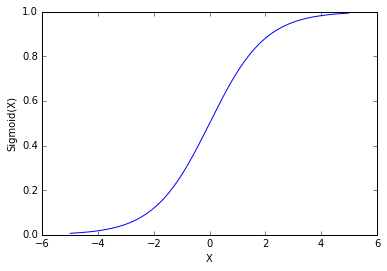

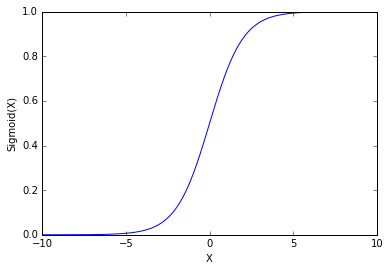

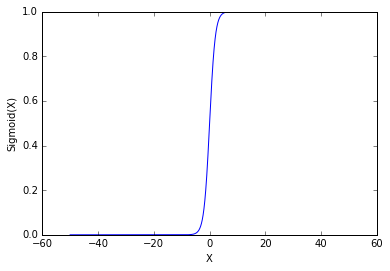

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt

# sigmaoid를 계산하는 함수
def sigmoid(inX):
    return 1.0/(1+exp(-inX))

def plotSigmoid(inX):
    fig = plt.figure() # 그림을 그릴 공간을 만듬
    ax = fig.add_subplot(111) # 1X1 공간의 1번 공간에 ax 그래프를 만듬
    x = arange(-inX, inX, 0.005)
    y = sigmoid(x)
    ax.plot(x, y)
    plt.xlabel('X'); plt.ylabel('Sigmoid(X)');
    plt.show()
    
plotSigmoid(5)
plotSigmoid(10)
plotSigmoid(50)

## 5.2 가장 좋은 회귀 계수를 찾기 위해 최적화 사용하기
* 시그모이드 함수의 입력은 $z$이며, 이 $z$는 다음과 같이 주어진다.

$$z = w_0x_0 + w_1x_1 + w_2x_2 + \dots + w_nx_n$$

* 위 식을 벡터로 표현하면 다음과 같이 쓸 수 있다.

$$z = w^Tx$$

### 5.2.1 기울기 상승
* 기울기 상승은 함수에서 최대 지점을 찾고자 할 때, 이 지점으로 이동하는 가장 좋은 방법이 기울기의 방향에 있다는 생각을 기반으로 한다.
* 기울기는 $\nabla$ 기호로 쓰며, 함수 $f(x,\,y)$의 기울기는 다음과 같은 방정식으로 표현된다.

$$
\nabla\,f(x,\,y)\,=\,
\begin{pmatrix}
\frac{\partial f(x,\,y)}{\partial x} \\
\frac{\partial f(x,\,y)}{\partial y}
\end{pmatrix}
$$

* 이 기울기는 $\frac{\partial f(x,\,y)}{\partial x}$ 만큼 $x$ 방향으로, 그리고 $\frac{\partial f(x,\,y)}{\partial y}$ 만큼 $y$ 방향으로 이동하는 것을 의미한다.

### 5.2.2 훈련: 기울기 상승을 사용하여 가장 좋은 매개변수 찾기

In [37]:
# Start with the weights all set to 1
# //모두 1로 설정된 가중치를 가지고 시작
# Repeat R number of times:
# //R번 반복
    # Calculate the gradient of the entire dataset
    # //입력 데이터 집합의 기울기를 계산
    # Update the weights vector by alpha*gradient
    # //알파*기울기로 가중치 벡터를 변경
    # Return the weights vector
    # //가중치 벡터 반환

#### 리스팅 5.1 로지스틱 회귀 기울기 상승 최적화 함수

In [3]:
from numpy import *

def loadDataSet():
    dataMat = []; labelMat = []
    fr = open('data/testSet.txt')
    for line in fr.readlines():
        lineArr = line.strip().split()
        dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])])
        labelMat.append(int(lineArr[2]))
    return dataMat,labelMat

def sigmoid(inX):
    return 1.0/(1+exp(-inX))

def gradAscent(dataMatIn, classLabels):
    dataMatrix = mat(dataMatIn)             #convert to NumPy matrix
    labelMat = mat(classLabels).transpose() #convert to NumPy matrix
    m,n = shape(dataMatrix)
    alpha = 0.001
    maxCycles = 500
    weights = ones((n,1))
    for k in range(maxCycles):              #heavy on matrix operations
        h = sigmoid(dataMatrix*weights)     #matrix mult
        error = (labelMat - h)              #vector subtraction
        weights = weights + alpha * dataMatrix.transpose()* error #matrix mult
    return weights

In [5]:
import logRegres
dataArr, labelMat = logRegres.loadDataSet()
logRegres.gradAscent(dataArr, labelMat)

matrix([[ 4.12414349],
        [ 0.48007329],
        [-0.6168482 ]])

### 5.2.3 분석: 의사결정 경계선 플롯하기

#### 리스팅 5.2 로지스틱 회귀 최적선과 데이터 집합 플롯하기

In [6]:
def plotBestFit(weights):
    import matplotlib.pyplot as plt
    dataMat,labelMat=loadDataSet()
    dataArr = array(dataMat)
    n = shape(dataArr)[0] 
    xcord1 = []; ycord1 = []
    xcord2 = []; ycord2 = []
    for i in range(n):
        if int(labelMat[i])== 1:
            xcord1.append(dataArr[i,1]); ycord1.append(dataArr[i,2])
        else:
            xcord2.append(dataArr[i,1]); ycord2.append(dataArr[i,2])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1, s=30, c='red', marker='s')
    ax.scatter(xcord2, ycord2, s=30, c='green')
    x = arange(-3.0, 3.0, 0.1)
    y = (-weights[0]-weights[1]*x)/weights[2]
    ax.plot(x, y)
    plt.xlabel('X1'); plt.ylabel('X2');
    plt.show()

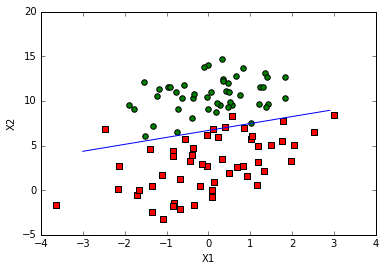

In [8]:
%matplotlib inline
reload(logRegres)
weights = logRegres.gradAscent(dataArr, labelMat)
logRegres.plotBestFit(weights.getA())

### 5.2.4 훈련: 확률적인 기울기 상승

In [11]:
# Start with the weights all set to 1
# //모두 1로 설정된 가중치를 가지고 시작
# For each piece of data in the dataset:
# //데이터 집합 내 각각의 데이터를 반복
    # Calculate the gradient of one piece of data
    # //데이터 중 하나의 기울기를 계산
    # Update the weights vector by alpha*gradient
    # //알파*기울기로 가중치 벡터를 변경
    # Return the weights vector
    # //가중치 벡터 반환

#### 리스팅 5.3 확률 기울기 상승

In [14]:
def stocGradAscent0(dataMatrix, classLabels):
    m,n = shape(dataMatrix)
    alpha = 0.01
    weights = ones(n)   #initialize to all ones
    for i in range(m):
        h = sigmoid(sum(dataMatrix[i]*weights))
        error = classLabels[i] - h
        weights = weights + alpha * error * dataMatrix[i]
    return weights

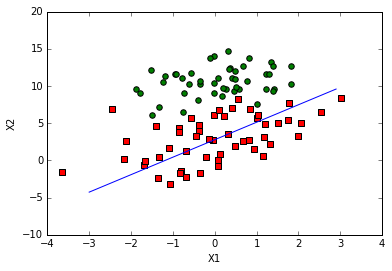

In [15]:
%matplotlib inline
reload(logRegres)
from numpy import *
dataArr, labelMat = logRegres.loadDataSet()
weights = logRegres.stocGradAscent0(array(dataArr), labelMat)
logRegres.plotBestFit(weights)

#### 리스팅 5.4 수정된 확률 기울기 상승 알고리즘

In [16]:
def stocGradAscent1(dataMatrix, classLabels, numIter=150):
    m,n = shape(dataMatrix)
    weights = ones(n)   #initialize to all ones
    for j in range(numIter):
        dataIndex = range(m)
        for i in range(m):
            alpha = 4/(1.0+j+i)+0.0001    #apha decreases with iteration, does not 
            randIndex = int(random.uniform(0,len(dataIndex)))#go to 0 because of the constant
            h = sigmoid(sum(dataMatrix[randIndex]*weights))
            error = classLabels[randIndex] - h
            weights = weights + alpha * error * dataMatrix[randIndex]
            del(dataIndex[randIndex])
    return weights

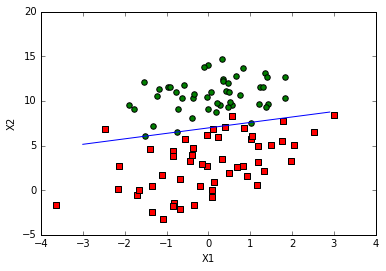

In [17]:
%matplotlib inline
reload(logRegres)
dataArr, labelMat = logRegres.loadDataSet()
weights = logRegres.stocGradAscent1(array(dataArr), labelMat)
logRegres.plotBestFit(weights)

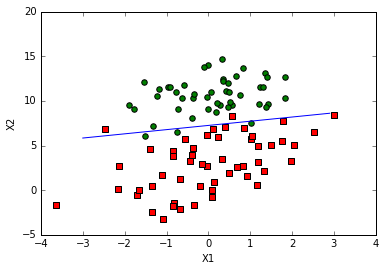

In [19]:
weights = logRegres.stocGradAscent1(array(dataArr), labelMat, 500)
logRegres.plotBestFit(weights)

## 5.3 예제: 말의 배앓이 치사율 평가하기

#### 예제: 말의 배앓이 치사율 평가를 위해 로지스틱 회귀 사용하기
1. 수집: 제공된 텍스트 파일
2. 준비: 파이썬에서 텍스트 파일을 구문 분석하고 누락된 값을 채운다.
3. 분석: 시각적으로 데이터를 검사한다.
4. 훈련: 가장 좋은 계수를 찾기 위해 최적화 알고리즘을 사용한다.
5. 검사: 성공적인 측정을 위해 오류율을 확인하게 된다. 오류율에 따라 훈련 단계로 되돌아가게 하는데, 이는 반복 횟수와 단계의 크기를 조절하여 더 좋은 회귀 계수 값을 찾도록 하기 위함이다.
6. 사용: 말의 증상을 수집하기 위해 간단한 커맨드라인(command-line) 프로그램을 구축한다. 그리고 어렵지 않게 생사를 진단한다.

### 5.3.1 준비: 데이터에서 누락된 값 다루기

### 5.3.2 검사: 로지스틱 회귀로 분류하기

#### 리스팅 5.5 로지스틱 회귀 분류 함수

In [20]:
def classifyVector(inX, weights):
    prob = sigmoid(sum(inX*weights))
    if prob > 0.5: return 1.0
    else: return 0.0

def colicTest():
    frTrain = open('data/horseColicTraining.txt'); frTest = open('data/horseColicTest.txt')
    trainingSet = []; trainingLabels = []
    for line in frTrain.readlines():
        currLine = line.strip().split('\t')
        lineArr =[]
        for i in range(21):
            lineArr.append(float(currLine[i]))
        trainingSet.append(lineArr)
        trainingLabels.append(float(currLine[21]))
    trainWeights = stocGradAscent1(array(trainingSet), trainingLabels, 1000)
    errorCount = 0; numTestVec = 0.0
    for line in frTest.readlines():
        numTestVec += 1.0
        currLine = line.strip().split('\t')
        lineArr =[]
        for i in range(21):
            lineArr.append(float(currLine[i]))
        if int(classifyVector(array(lineArr), trainWeights))!= int(currLine[21]):
            errorCount += 1
    errorRate = (float(errorCount)/numTestVec)
    print "the error rate of this test is: %f" % errorRate
    return errorRate

def multiTest():
    numTests = 10; errorSum=0.0
    for k in range(numTests):
        errorSum += colicTest()
    print "after %d iterations the average error rate is: %f" % (numTests, errorSum/float(numTests))

In [22]:
reload(logRegres)
logRegres.multiTest()

the error rate of this test is: 0.328358
the error rate of this test is: 0.402985
the error rate of this test is: 0.402985
the error rate of this test is: 0.298507
the error rate of this test is: 0.343284
the error rate of this test is: 0.343284
the error rate of this test is: 0.358209
the error rate of this test is: 0.238806
the error rate of this test is: 0.447761
the error rate of this test is: 0.432836
after 10 iterations the average error rate is: 0.359701


## 5.4 요약

## Reference

#### 로지스틱 회귀분석(Logistic regression)
* http://sqlmvp.kr/140189702419

#### LaTeX
* https://en.wikibooks.org/wiki/LaTeX/Mathematics
* http://nbviewer.jupyter.org/github/twistedhardware/mltutorial/blob/master/notebooks/jupyter/2.%20Markdown%20%26%20LaTeX.ipynb